In [1]:
import time
import copy
import numpy as np
from skimage.filters import gaussian
import cv2

import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave
import cPickle as pickle

%reload_ext autoreload
%autoreload 2

from netsurface2d import NetSurf2d
from netsurface2dt import NetSurf2dt
from data3d import Data3d

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Load time-lapse data...

In [2]:
# filename = '/Users/jug/Repositories/GIT/BobSeg/TestLapseData2d_151119-nmy2GFP-tagRfpPH-wt-04_w1LMM_488+488_LP_myTestCrop_bgrem.tif'
# filename = '/Users/jug/Dropbox/ProjectGoldstein/4MyosinMembraneWholeEmbryo.tif'
filename = '/Users/jug/Dropbox/ProjectGoldstein/2017-01-17_from_Mark/MAX_LP409_ventral-Concat_CROP_RGB_test.tif'

stack = imread(filename)
print 'Stack shape:',stack.shape

segchannel = stack[:,1,:,:]
flowchannel = stack[:,0,:,:]
sigma = [0.,2.,2.]
segchannel_smooth = gaussian(segchannel,sigma)

print 'Segchannel shape:',segchannel.shape
print 'Single image:',segchannel[0].shape

Stack shape: (20, 2, 542, 919)


/usr/local/lib/python2.7/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


Segchannel shape: (20, 542, 919)
Single image: (542, 919)


In [3]:
max_rs = (segchannel[0].shape[1] / 3,
          segchannel[0].shape[1] / 3)

min_rs = (5,5)
print min_rs, max_rs

(5, 5) (306, 306)


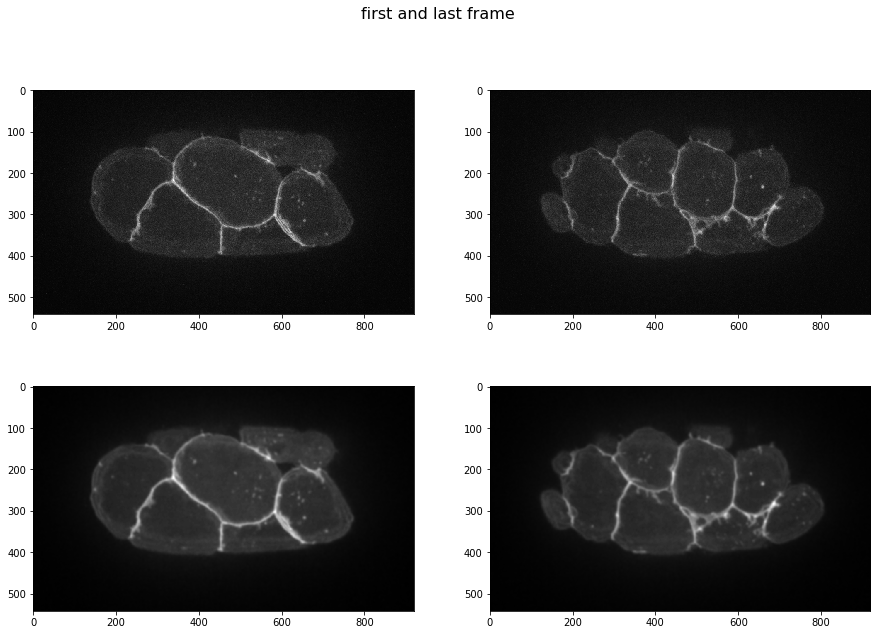

In [4]:
fig = plt.figure()
fig.suptitle('first and last frame', fontsize=16)
ax = fig.add_subplot(221)
ax.imshow(segchannel[0], plt.get_cmap('gray'))
ax = fig.add_subplot(222)
ax.imshow(segchannel[-1], plt.get_cmap('gray'))
ax = fig.add_subplot(223)
ax.imshow(segchannel_smooth[0], plt.get_cmap('gray'))
ax = fig.add_subplot(224)
ax.imshow(segchannel_smooth[-1], plt.get_cmap('gray'))

# Adding cells

In [5]:
data = Data3d( segchannel_smooth, pixelsize=(1.,1.), silent=False )
data.set_seg_params(num_columns=72,K=100,max_delta_k=4)
objects = []

### Ea

In [6]:
Ea = data.init_object("Ea")
objects.append(Ea)

In [7]:
data.add_object_at( Ea, min_rs, max_rs, frame=0, seed=(230,240), segment_it=True )
data.track(Ea, seed_frame=0, target_frames=range(1,len(data.images)), recenter_iterations=1)

Added appearance for "Ea" in frame 0 with seed coordinates [ 230.  240.]
      Optimum energy:  0.0749448912184
      Nodes in/out:  2066 5134
      Area:  23878.0
Added appearance for "Ea" in frame 1 with seed coordinates [ 230.  240.]
      Optimum energy:  0.0676853046455
      Nodes in/out:  2099 5101
      Area:  24432.5
    Updated center to [228 239]
Added appearance for "Ea" in frame 2 with seed coordinates [ 228.  239.]
      Optimum energy:  0.0612515016383
      Nodes in/out:  2094 5106
      Area:  24246.0
    Updated center to [229 240]
Added appearance for "Ea" in frame 3 with seed coordinates [ 229.  240.]
      Optimum energy:  0.062530624679
      Nodes in/out:  2085 5115
      Area:  23884.0
    Updated center to [229 240]
Added appearance for "Ea" in frame 4 with seed coordinates [ 229.  240.]
      Optimum energy:  0.0620053683757
      Nodes in/out:  2097 5103
      Area:  24250.5
    Updated center to [230 242]
Added appearance for "Ea" in frame 5 with seed coordi

In [8]:
data.segment2dt( Ea, max_radial_delta=2 )

Results for frame 0:
      Optimum energy:  1.43327436143
      Area:  23960.5
Results for frame 1:
      Optimum energy:  1.43327436143
      Area:  24190.0
Results for frame 2:
      Optimum energy:  1.43327436143
      Area:  24059.5
Results for frame 3:
      Optimum energy:  1.43327436143
      Area:  24119.0
Results for frame 4:
      Optimum energy:  1.43327436143
      Area:  24695.0
Results for frame 5:
      Optimum energy:  1.43327436143
      Area:  24628.0
Results for frame 6:
      Optimum energy:  1.43327436143
      Area:  24614.0
Results for frame 7:
      Optimum energy:  1.43327436143
      Area:  24925.0
Results for frame 8:
      Optimum energy:  1.43327436143
      Area:  25122.5
Results for frame 9:
      Optimum energy:  1.43327436143
      Area:  24625.0
Results for frame 10:
      Optimum energy:  1.43327436143
      Area:  24423.5
Results for frame 11:
      Optimum energy:  1.43327436143
      Area:  23909.0
Results for frame 12:
      Optimum energy:  1.433

### Ep

In [9]:
Ep = data.init_object("Ep")
objects.append(Ep)

In [10]:
data.add_object_at( Ep, min_rs, max_rs, frame=0, seed=(350,330), segment_it=True )
data.track(Ep, seed_frame=0, target_frames=range(1,len(data.images)), recenter_iterations=1)

Added appearance for "Ep" in frame 0 with seed coordinates [ 350.  330.]
      Optimum energy:  0.0862175998874
      Nodes in/out:  2018 5182
      Area:  23079.0
Added appearance for "Ep" in frame 1 with seed coordinates [ 350.  330.]
      Optimum energy:  0.0887357557211
      Nodes in/out:  2022 5178
      Area:  23003.5
    Updated center to [350 325]
Added appearance for "Ep" in frame 2 with seed coordinates [ 350.  325.]
      Optimum energy:  0.0855881869519
      Nodes in/out:  1979 5221
      Area:  21865.5
    Updated center to [352 323]
Added appearance for "Ep" in frame 3 with seed coordinates [ 352.  323.]
      Optimum energy:  0.0933677078443
      Nodes in/out:  1982 5218
      Area:  21786.0
    Updated center to [354 323]
Added appearance for "Ep" in frame 4 with seed coordinates [ 354.  323.]
      Optimum energy:  0.0908538576026
      Nodes in/out:  2015 5185
      Area:  22450.5
    Updated center to [355 324]
Added appearance for "Ep" in frame 5 with seed coord

In [11]:
data.segment2dt( Ep, max_radial_delta=2 )

Results for frame 0:
      Optimum energy:  2.02613336089
      Area:  22973.5
Results for frame 1:
      Optimum energy:  2.02613336089
      Area:  22229.5
Results for frame 2:
      Optimum energy:  2.02613336089
      Area:  21883.5
Results for frame 3:
      Optimum energy:  2.02613336089
      Area:  21895.0
Results for frame 4:
      Optimum energy:  2.02613336089
      Area:  21762.5
Results for frame 5:
      Optimum energy:  2.02613336089
      Area:  22014.0
Results for frame 6:
      Optimum energy:  2.02613336089
      Area:  22274.0
Results for frame 7:
      Optimum energy:  2.02613336089
      Area:  22212.5
Results for frame 8:
      Optimum energy:  2.02613336089
      Area:  22157.5
Results for frame 9:
      Optimum energy:  2.02613336089
      Area:  22644.5
Results for frame 10:
      Optimum energy:  2.02613336089
      Area:  22412.0
Results for frame 11:
      Optimum energy:  2.02613336089
      Area:  21976.5
Results for frame 12:
      Optimum energy:  2.026

# Visualisation stuff 

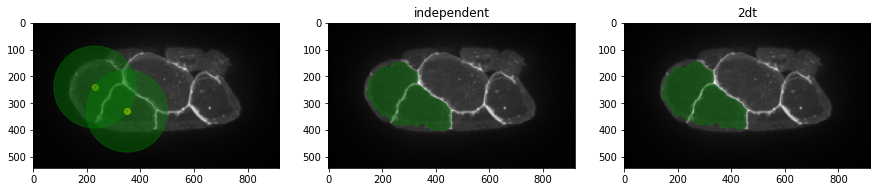

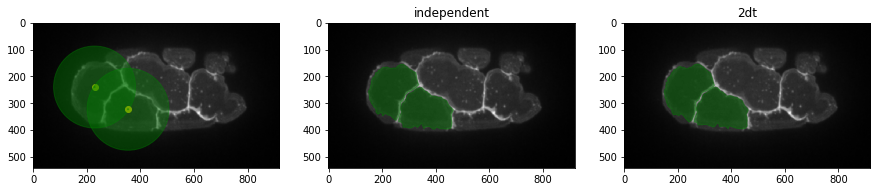

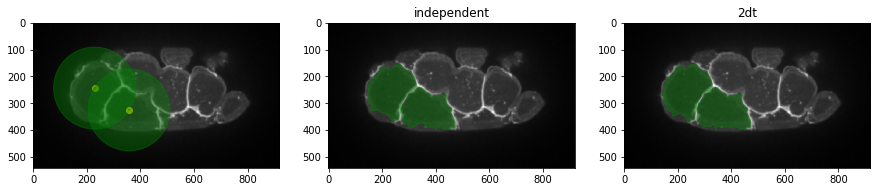

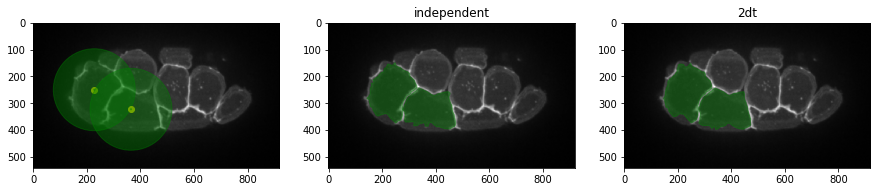

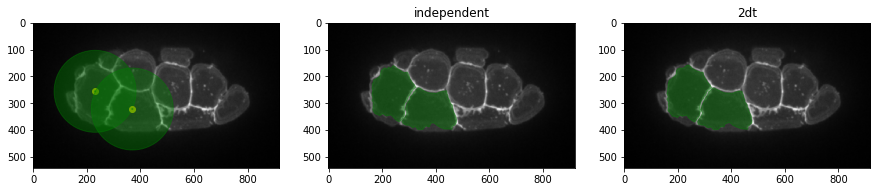

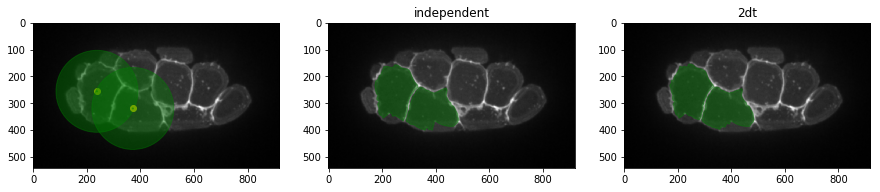

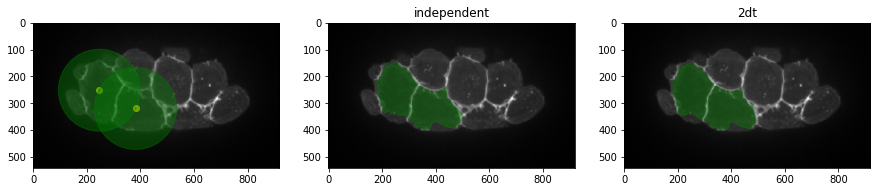

In [12]:
for frame in range(1,len(data.images),len(data.images)/6):
    fig = plt.figure()
    ax = plt.subplot(131)
    data.plot_minmax( frame, ax )
    ax = plt.subplot(132)
    ax.set_title('independent')
    data.plot_result( frame, ax )    
    ax = plt.subplot(133)
    ax.set_title('2dt')
    data.plot_2dt_result( frame, ax )

# FLOW

### See the loaded flow channel images...

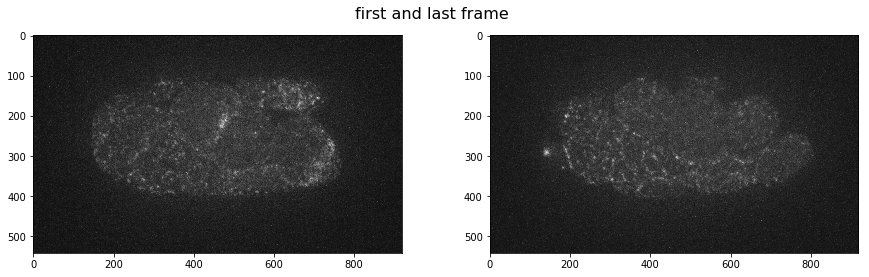

In [13]:
pylab.rcParams['figure.figsize'] = (15, 4)
fig = plt.figure()
fig.suptitle('first and last frame', fontsize=16)
ax = fig.add_subplot(121)
ax.imshow(flowchannel[0], plt.get_cmap('gray'))
ax = fig.add_subplot(122)
ax.imshow(flowchannel[-1], plt.get_cmap('gray'))

In [14]:
data.compute_flow( flowchannel, 
                   segchannel, 
                   folder='/Users/jug/Repositories/GIT/BobSeg/frames3d_tempconsistent_newFeatureTest/', 
                   show=True, 
                   inline=False )

## Export Data (for figure creation)

In [38]:
folder = '/Users/jug/Repositories/GIT/BobSeg/export/'

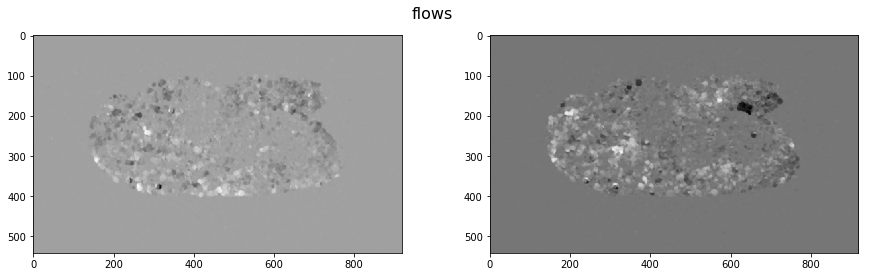

In [25]:
fig = plt.figure()
fig.suptitle('flows', fontsize=16)
ax = fig.add_subplot(121)
ax.imshow(np.array(data.flows[1])[:,:,0], plt.get_cmap('gray'))
ax = fig.add_subplot(122)
ax.imshow(np.array(data.flows[1])[:,:,1], plt.get_cmap('gray'))

In [39]:
imsave(folder+'test.tiff', np.rollaxis(np.array(data.flows[1]),2))

In [43]:
imsave(folder+'flow.tiff', np.swapaxes(np.swapaxes(data.flows,1,3),2,3))
imsave(folder+'stack.tiff', stack)